In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

In [7]:
df = pd.read_csv("cost_of_living_us.csv")


df.head()

,case_id,state,isMetro,"Metro 1=Yes, 0=No",areaname,county,County & State,Latitude,Longitude,family_member_count,...,Total Household Members,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,93,AK,False,0,"Valdez-Cordova Census Area, AK",Valdez-Cordova Census Area,"Valdez-Cordova Census Area, AK",61.4,-144.5,1p0c,...,1,8880.0,3314.12148,11220.25776,6093.28020,4418.41116,0.00000,5227.35540,39153.4248,101760.5156
1,93,AK,False,0,"Valdez-Cordova Census Area, AK",Valdez-Cordova Census Area,"Valdez-Cordova Census Area, AK",61.4,-144.5,1p1c,...,2,13452.0,4881.53352,12094.24320,9146.52984,6642.96240,10128.09888,6490.34400,62835.7152,101760.5156
2,93,AK,False,0,"Valdez-Cordova Census Area, AK",Valdez-Cordova Census Area,"Valdez-Cordova Census Area, AK",61.4,-144.5,1p2c,...,3,13452.0,6902.41848,12899.98800,12199.77960,7375.20852,18694.95120,7789.57032,79313.9184,101760.5156
3,93,AK,False,0,"Valdez-Cordova Census Area, AK",Valdez-Cordova Census Area,"Valdez-Cordova Census Area, AK",61.4,-144.5,1p3c,...,4,16728.0,9301.02468,13916.65560,15253.02840,9431.34228,21330.90360,10484.55468,96445.5120,101760.5156
4,93,AK,False,0,"Valdez-Cordova Census Area, AK",Valdez-Cordova Census Area,"Valdez-Cordova Census Area, AK",61.4,-144.5,1p4c,...,5,16728.0,11448.61236,14140.80000,18306.27840,10209.49800,21330.90360,10449.28128,102613.3716,101760.5156


## Data Cleansing

This section will include data cleaning and preparation steps such as:
- Handling missing values  
- Removing blanks  
- Renaming columns  
- Creating calculated fields  
- Updating metro column from TRUE/FALSE to 1/0  
- Adding latitude and longitude columns for later Geo visualizations  
- Adding adults, children, and total columns for number of people  
- Standardizing formats
formats

# Capstone 2: Problem Statement

**Problem Statement:**  
How can we identify the most and least affordable U.S. counties for families of four in 2024 by comparing total living costs (including housing, food, childcare, transportation, etc.) to median household income?

This analysis aims to uncover key cost drivers and demographic or geographic patterns that affect affordability. Insights will help explain where and why certain counties are more financially sustainable for average families.


## Analysis: Affordable Counties

### 1. Lower Cost Burden
- Total cost of living is low relative to median household income  
- May feature lower housing, childcare, or transportation expenses

### 2. Favorable Economic Conditions
- Higher median income relative to local prices  
- Access to public infrastructure or subsidies (e.g., metropolitan areas vs. non-metro)ons
formats

## Analysis: Unaffordable Counties

### 1. Higher Cost Burden
- Expenses (especially housing or childcare) are high compared to income  
- Possible urban cost inflation (e.g., metro areas with housing shortages)

### 2. Economic Strain or Inequality
- Low median household income not keeping pace with rising costs  
- Income inequality or lack of local wage growth

## Metro vs. Non-Metro Areas: Impact on Cost of Living

This section explores how living in a metro area affects the total cost of living. 
By comparing metro and non-metro counties, we can identify whether population density and urban infrastructure influence affordability. 
This relates directly to the issue of cost burden and regional differences.


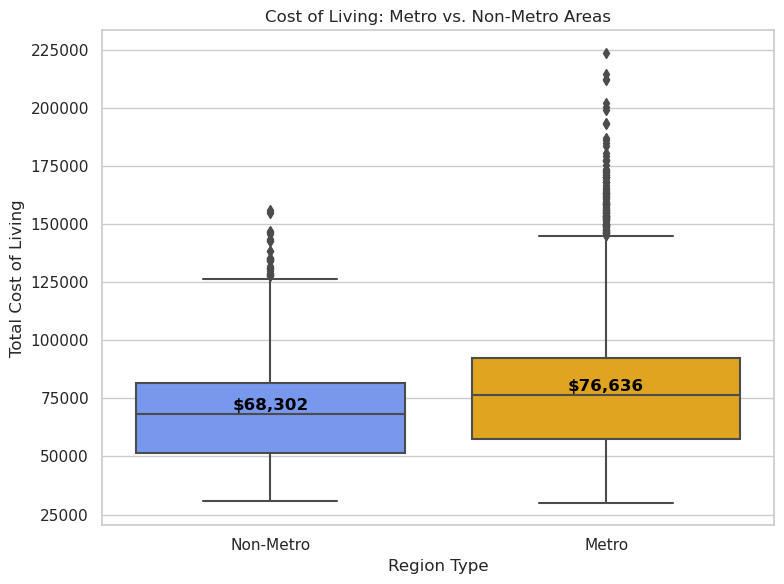

In [21]:
# Boxplot comparing metro vs. non-metro total cost
plt.figure(figsize=(8,6))
sns.boxplot(x="Metro 1=Yes, 0=No", y="total_cost", data=df, palette=["#648FFF", "#FFB000"])

# Add median labels to each box
medians = df.groupby("Metro 1=Yes, 0=No")["total_cost"].median()
for i, median in enumerate(medians):
    plt.text(i, median + 1500, f"${int(median):,}", ha='center', color='black', fontweight='bold')

# Update x-axis labels
plt.xticks([0, 1], ["Non-Metro", "Metro"])

plt.title("Cost of Living: Metro vs. Non-Metro Areas")
plt.xlabel("Region Type")
plt.ylabel("Total Cost of Living")
plt.tight_layout()
plt.show()


### Metro vs. Non-Metro Areas: Impact on Cost of Living

This boxplot compares total living costs between metro and non-metro U.S. counties.

- **Metro areas** tend to have a **higher median cost of living**, with wider variability and more extreme outliers.
- **Non-metro counties** generally exhibit lower and more consistent living expenses.

This supports the hypothesis that **urban living introduces a higher cost burden**, especially in categories like housing and childcare. 
It also reinforces the issue tree insight that metro status is a strong factor influencing affordability.


## Correlation Between Family Size and Living Expenses

Here we analyze how the number of people in a household impacts total and category-specific expenses. 
This helps assess whether larger households consistently face higher costs and in which areas (e.g., housing, food, childcare). 
This ties into both cost burden and economic strain issues identified in the issue tree.


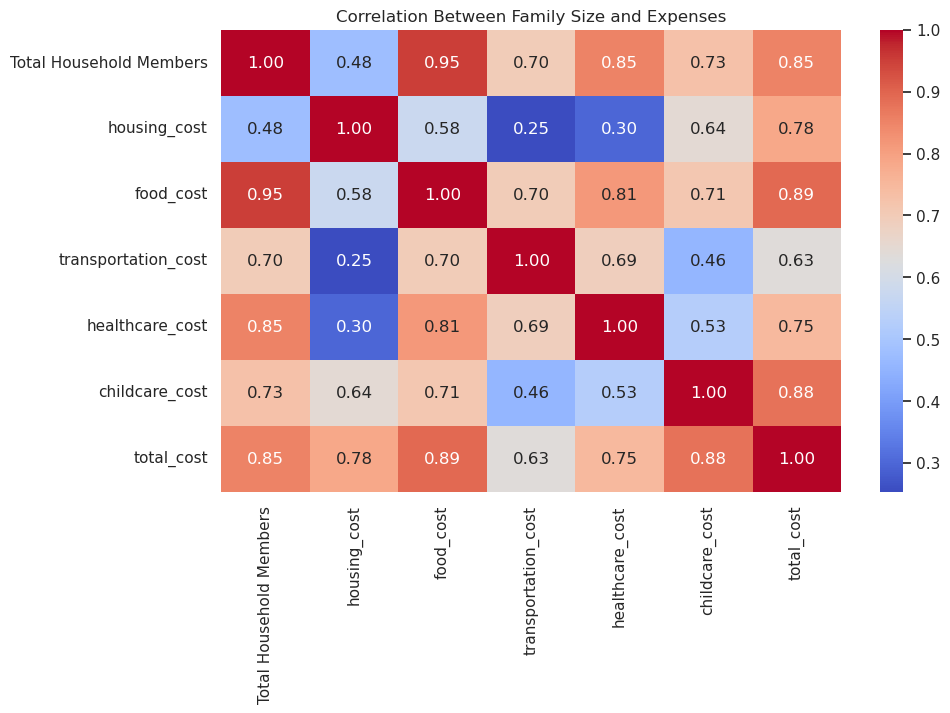

In [13]:
# Correlation matrix for family size and cost categories
columns_to_check = ["Total Household Members", "housing_cost", "food_cost", 
                    "transportation_cost", "healthcare_cost", "childcare_cost", 
                    "total_cost"]
correlation_matrix = df[columns_to_check].corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Family Size and Expenses")
plt.show()


### Correlation Between Family Size and Living Expenses

This heatmap visualizes the strength of correlation between household size and different expense categories.

- **Food cost** shows the strongest correlation with family size (0.95), followed by **healthcare**, **childcare**, and **transportation**.
- **Housing costs** have the weakest correlation (0.48), suggesting that housing prices are not as sensitive to household size.
- Overall, the **total cost of living increases significantly as household size increases**, highlighting increased burden on larger families.

These insights support our hypothesis around affordability strain and cost drivers for families, especially those with children.


## Expense Breakdown by Household Size

This section looks at which types of expenses dominate for households of different sizes. 
We group average spending by total household members and visualize trends in categories like housing, food, transportation, and more. 
This helps surface insights into what drives the largest expenses as households grow.


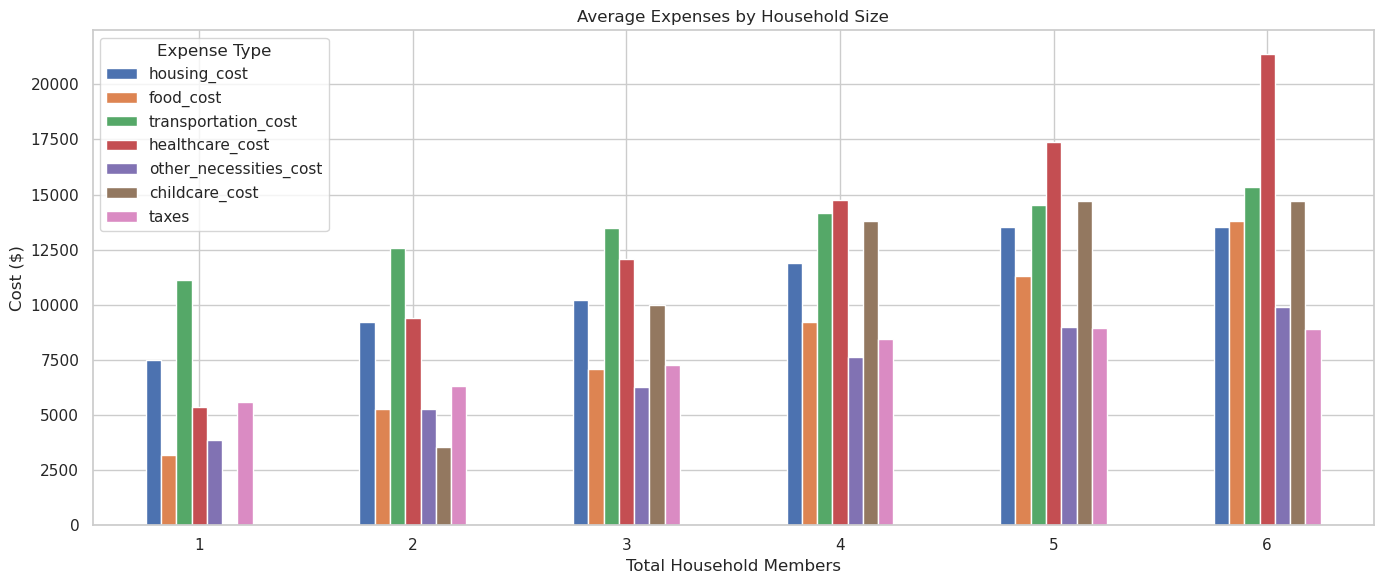

In [15]:
# Average spending by household size
spending_by_size = df.groupby("Total Household Members")[[
    "housing_cost", "food_cost", "transportation_cost", 
    "healthcare_cost", "other_necessities_cost", "childcare_cost", "taxes"
]].mean()

# Plot
spending_by_size.plot(kind="bar", figsize=(14,6))
plt.title("Average Expenses by Household Size")
plt.ylabel("Cost ($)")
plt.xlabel("Total Household Members")
plt.xticks(rotation=0)
plt.legend(title="Expense Type")
plt.tight_layout()
plt.show()


### Expense Breakdown by Household Size

This bar chart displays average annual expenses across major cost categories for households of different sizes.

- As household size increases, all costs rise — but some more than others.
- **Healthcare and childcare** costs show the most dramatic increases, especially for families of 4 or more.
- **Food and housing** costs also grow with family size, though housing increases more gradually.
- These trends help highlight the key budgetary pressures that make larger households more financially vulnerable.

This reinforces our earlier correlation findings and strengthens the case that **household size is a major factor in affordability.**


## Cost Category Share of Total Living Expenses

This section calculates what percentage of a household’s total expenses goes to each major cost category. 
By understanding which expenses dominate household budgets, we can identify key cost drivers that may contribute to a county's overall affordability or unaffordability.


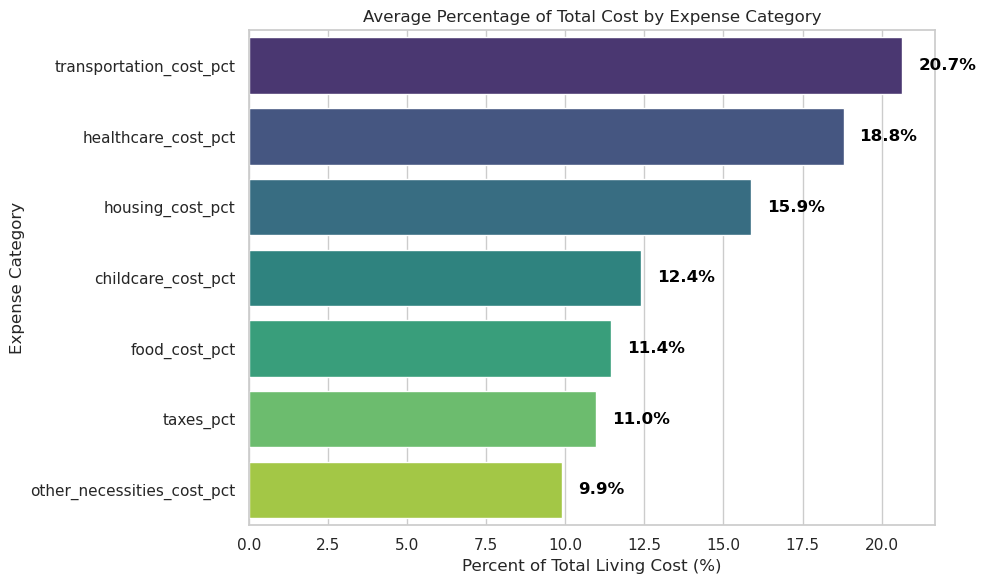

In [22]:
# Bar plot with percentage labels
plt.figure(figsize=(10,6))
ax = sns.barplot(x=avg_pct.values, y=avg_pct.index, palette="viridis")
plt.title("Average Percentage of Total Cost by Expense Category")
plt.xlabel("Percent of Total Living Cost (%)")
plt.ylabel("Expense Category")

# Add labels to each bar
for i, v in enumerate(avg_pct.values):
    ax.text(v + 0.5, i, f"{v:.1f}%", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()



### Cost Category Share of Total Living Expenses

This bar chart displays the average percentage that each major expense category contributes to total living costs.

- **Transportation** and **healthcare** represent the largest shares of spending, followed closely by **housing**.
- **Childcare** and **food** also account for significant portions of a household’s budget.
- **Taxes** and **other necessities** represent smaller — but still important — slices of total spending.

This helps identify which categories most heavily impact household affordability and cost burden across all family types.


## Regional Affordability: Cost of Living vs. Median Income

To evaluate overall affordability, we calculate an affordability ratio: total cost of living divided by median family income. 
This lets us compare how financially burdensome life is in different counties. 
This metric supports geographic analysis in Tableau and helps identify areas with the greatest or least affordability pressure.


In [26]:
# Create affordability ratio
df["affordability_ratio"] = df["total_cost"] / df["median_family_income"]

# Summary statistics to explore extremes
df["affordability_ratio"].describe()


count    31430.000000
mean         1.074321
std          0.349495
min          0.255919
25%          0.815286
50%          1.066300
75%          1.301080
max          4.036420
Name: affordability_ratio, dtype: float64

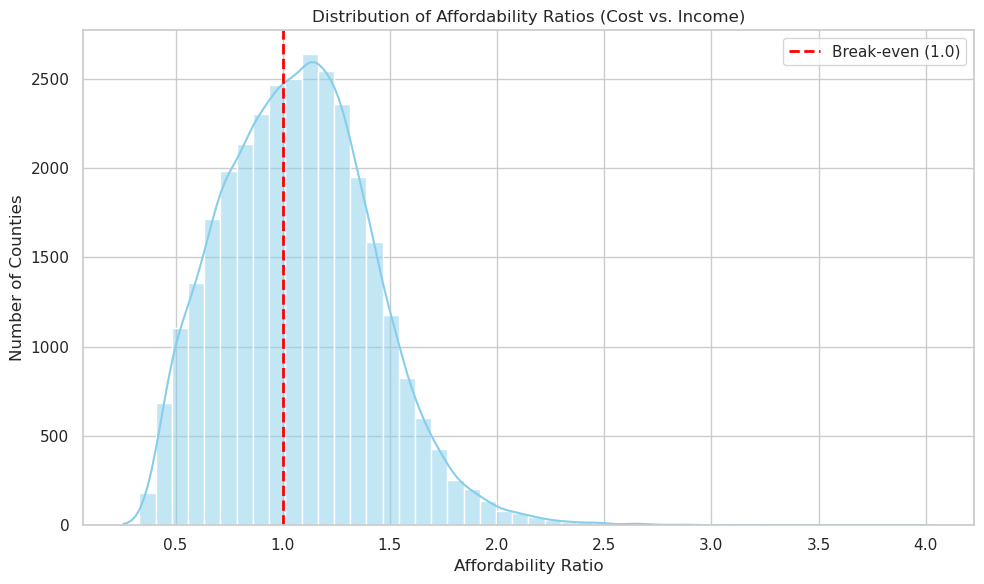

In [27]:
# Histogram of affordability ratio
plt.figure(figsize=(10,6))
sns.histplot(df["affordability_ratio"], bins=50, kde=True, color="skyblue")
plt.axvline(1.0, color='red', linestyle='--', linewidth=2, label="Break-even (1.0)")
plt.title("Distribution of Affordability Ratios (Cost vs. Income)")
plt.xlabel("Affordability Ratio")
plt.ylabel("Number of Counties")
plt.legend()
plt.tight_layout()
plt.show()

### Regional Affordability: Cost of Living vs. Median Income

This section examines affordability by comparing total cost of living to median family income across U.S. counties. The result is an **affordability ratio**, where:

- **Ratio < 1.0** = affordable (costs < income)
- **Ratio > 1.0** = unaffordable (costs > income)

**Key Stats:**
- Average affordability ratio = **1.07**
- Median = **1.07**
- 25% of counties have a ratio above **1.30**
- Extreme outliers exceed **4.0**, indicating severe affordability pressure

This quantitative analysis supports the conclusion that **most U.S. counties are not affordable for the average family of four** — a key finding in support of our problem statement.


## Affordability Threshold for a Family of Four

This section evaluates whether a typical family of four can afford to live in each U.S. county, based on the relationship between total cost of living and median family income. 
A county is considered affordable if the total cost of living is less than the median family income. This directly addresses our core problem statement.


Affordable Counties: 13546
Unaffordable Counties: 17884


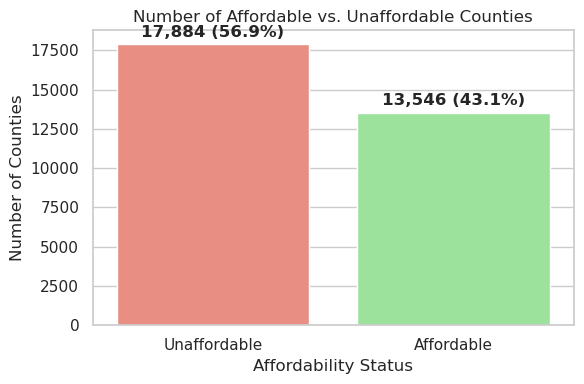

In [28]:
# Create binary flag for affordability
df["affordable_for_family_of_4"] = df["total_cost"] < df["median_family_income"]

# Count how many counties are affordable
affordable_counts = df["affordable_for_family_of_4"].value_counts()

# Print summary
print("Affordable Counties:", affordable_counts[True])
print("Unaffordable Counties:", affordable_counts[False])

# Bar chart with labels
plt.figure(figsize=(6,4))
ax = sns.countplot(x="affordable_for_family_of_4", data=df, palette=["salmon", "lightgreen"])
plt.xticks([0,1], ["Unaffordable", "Affordable"])
plt.title("Number of Affordable vs. Unaffordable Counties")
plt.ylabel("Number of Counties")
plt.xlabel("Affordability Status")

# Add text labels
affordable_counts = df["affordable_for_family_of_4"].value_counts()
for i, count in enumerate(affordable_counts):
    percent = count / df.shape[0] * 100
    ax.text(i, count + 500, f"{count:,} ({percent:.1f}%)", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



### Affordability Threshold for a Family of Four

This analysis classifies each U.S. county as either **affordable** or **unaffordable** for a family of four, based on whether total living costs are below median family income.

**Results:**
- Affordable Counties: **13,546** (43.1%)
- Unaffordable Counties: **17,884** (56.9%)

This binary threshold reinforces that **more than half of U.S. counties are unaffordable**, aligning with earlier affordability ratio analysis. 
It provides a concrete, actionable benchmark for identifying geographic cost pressure across the country.


## Regional Distribution of Affordable Counties

This section breaks down how many counties are considered affordable for a family of four in each U.S. state. 
It helps identify geographic trends and clusters of affordability, supporting regional comparisons and policy insights.


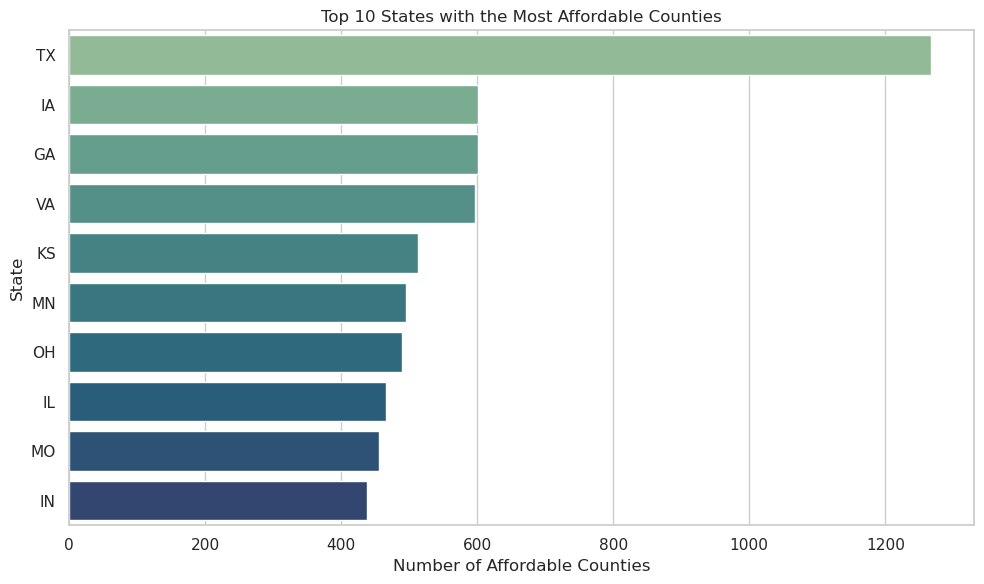

In [18]:
# Count of affordable counties per state
affordable_by_state = df[df["affordable_for_family_of_4"]].groupby("state").size().sort_values(ascending=False)

# Top 10 states with the most affordable counties
plt.figure(figsize=(10,6))
sns.barplot(x=affordable_by_state.values[:10], y=affordable_by_state.index[:10], palette="crest")
plt.title("Top 10 States with the Most Affordable Counties")
plt.xlabel("Number of Affordable Counties")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### Regional Distribution of Affordable Counties

This bar chart highlights the top 10 U.S. states with the most counties classified as affordable for a family of four.

- **Texas** leads significantly, followed by states like **Iowa**, **Georgia**, and **Virginia**.
- The majority of states in the top 10 are located in the **Midwest or South**, where living costs are generally lower.

This analysis supports the insight that **affordability is geographically clustered**, and that certain regions are more likely to support the financial needs of larger households.


## Affordability Comparison: Metro vs. Non-Metro Areas

This section compares the number of affordable counties in metro areas versus non-metro areas. 
It helps determine whether metro regions are more or less likely to be affordable for a family of four.


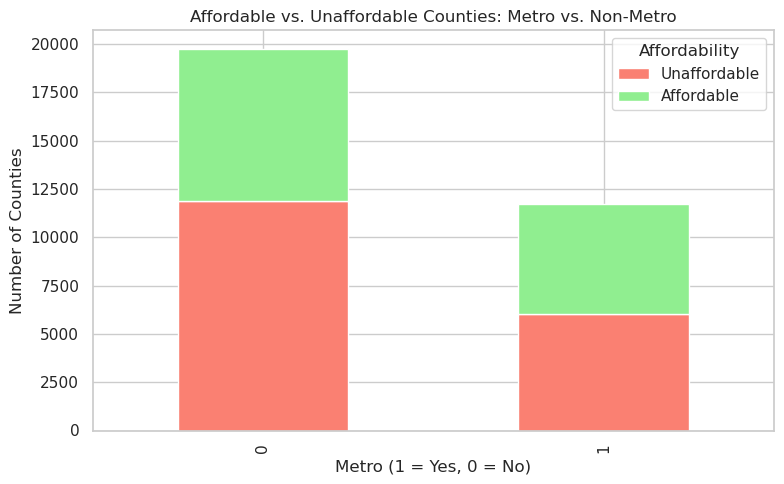

In [20]:
# Metro vs Non-Metro affordability count
metro_afford = df.groupby("Metro 1=Yes, 0=No")["affordable_for_family_of_4"].value_counts().unstack()

# Plot
metro_afford.plot(kind="bar", stacked=True, figsize=(8,5), color=["salmon", "lightgreen"])
plt.title("Affordable vs. Unaffordable Counties: Metro vs. Non-Metro")
plt.xlabel("Metro (1 = Yes, 0 = No)")
plt.ylabel("Number of Counties")
plt.legend(title="Affordability", labels=["Unaffordable", "Affordable"])
plt.tight_layout()
plt.show()


### Affordability Comparison: Metro vs. Non-Metro Areas

This stacked bar chart compares the number of affordable and unaffordable counties in **metro vs. non-metro** regions.

- **Non-metro areas** contain a greater number of counties overall and a **larger share of affordable counties**.
- **Metro counties** are more likely to be unaffordable, with higher cost burdens and fewer counties falling below the affordability threshold.

This supports the hypothesis that **urbanization contributes to reduced affordability**, and highlights the geographic disparities influencing cost-of-living sustainability.


## Insights

This analysis explored cost-of-living affordability across U.S. counties for a family of four by comparing total household expenses to median income. The following key insights emerged:

- **Metro counties are more expensive** and more likely to be unaffordable, with significantly higher median living costs and greater cost variability.
- **Household size strongly influences expenses**, with larger families facing especially high costs in childcare, food, and healthcare.
- **The most expensive categories** across households are transportation, healthcare, and housing — which together consume over 50% of total living costs.
- **More than half of U.S. counties (57%) are unaffordable** under the threshold of living costs exceeding median family income.
- **Affordable counties are concentrated in the South and Midwest**, particularly in Texas, Iowa, and Georgia.
- **Non-metro areas account for a greater number and proportion of affordable counties**, reinforcing the geographic divide in cost burden.

These findings confirm that affordability is a systemic issue for many American families — especially in urban and high-density areas — and highlight where future attention or support could be directed.
